In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
path = "https://raw.githubusercontent.com/mbenturk77/urinary_inflammation_prediction/main/urinary_inflammation.csv"
df = pd.read_csv(path,sep=';',skipinitialspace=True)
df

,temperature,occurrence_of_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,nephritis_of_renal_pelvis_origin,inflammation_of_urinary_bladder
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,no,yes
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,no,yes
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,yes,no
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,yes,no
118,41.5,no,yes,yes,no,yes,yes,no


In [3]:
# Analysing data types (Except temperature column, all other columns are classification.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   temperature                       120 non-null    float64
 1   occurrence_of_nausea              120 non-null    object 
 2   lumbar_pain                       120 non-null    object 
 3   urine_pushing                     120 non-null    object 
 4   micturition_pains                 120 non-null    object 
 5   burning_of_urethra                120 non-null    object 
 6   nephritis_of_renal_pelvis_origin  120 non-null    object 
 7   inflammation_of_urinary_bladder   120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


# Descriptive Statistics of The Data, Missing Values and Outliers

In [4]:
# Checking missing values (There is no missing value in the data)
print(pd.isnull(df).any())

temperature                         False
occurrence_of_nausea                False
lumbar_pain                         False
urine_pushing                       False
micturition_pains                   False
burning_of_urethra                  False
nephritis_of_renal_pelvis_origin    False
inflammation_of_urinary_bladder     False
dtype: bool


In [5]:
# Descriptive Statistics
df.describe().round(2)

,temperature
count,120.00
mean,38.72
std,1.82
min,35.50
25%,37.10
50%,37.95
75%,40.60
max,41.50


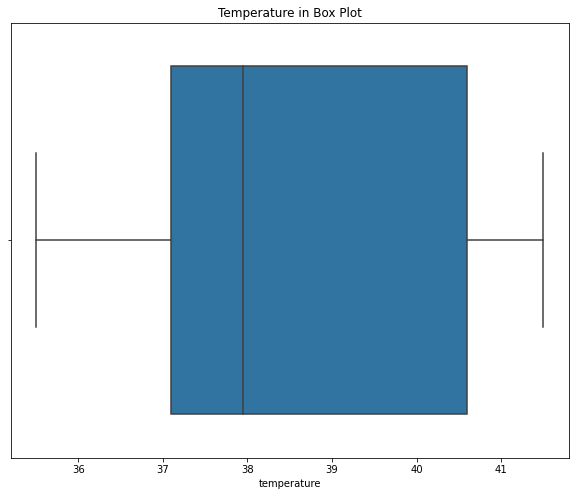

In [6]:
# Visualizing Descriptive Statistics
import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.boxplot(df['temperature'])
plt.title('Temperature in Box Plot')
plt.show()

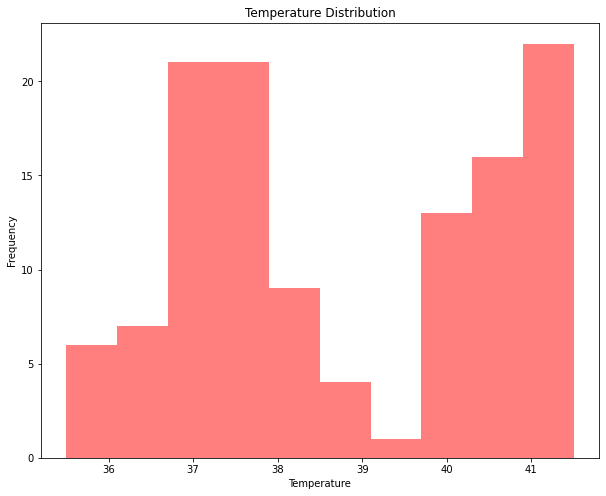

In [7]:
fig = plt.figure(figsize=(10,8))
plt.hist(df['temperature'],10,facecolor='red', alpha=0.5, label='Temperature')
plt.title('Temperature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Categorical Data Analysis

In [8]:
for i in df.select_dtypes(exclude=['float64']).columns:
    print('The {} column include {} values.'.format(str(i), df[i].unique()))
    print('The {} % of the column is {} .'.format((((df[i][df[i]==df[i].unique()[0]].count())/len(df))*100).round(2),df[i].unique()[0]))


The occurrence_of_nausea column include ['no' 'yes'] values.
The 75.83 % of the column is no .
The lumbar_pain column include ['yes' 'no'] values.
The 58.33 % of the column is yes .
The urine_pushing column include ['no' 'yes'] values.
The 33.33 % of the column is no .
The micturition_pains column include ['no' 'yes'] values.
The 50.83 % of the column is no .
The burning_of_urethra column include ['no' 'yes'] values.
The 58.33 % of the column is no .
The nephritis_of_renal_pelvis_origin column include ['no' 'yes'] values.
The 58.33 % of the column is no .
The inflammation_of_urinary_bladder column include ['no' 'yes'] values.
The 50.83 % of the column is no .


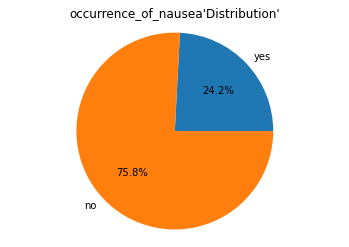

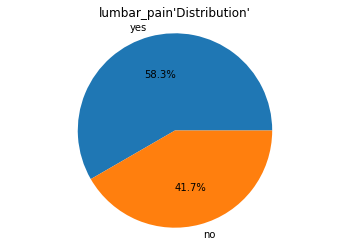

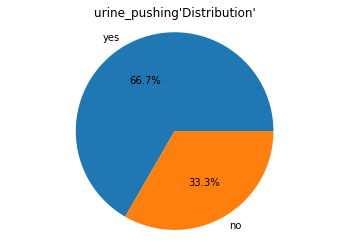

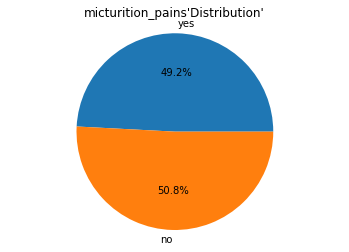

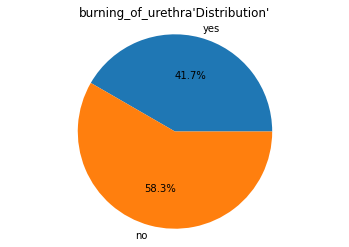

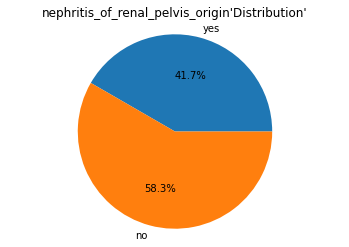

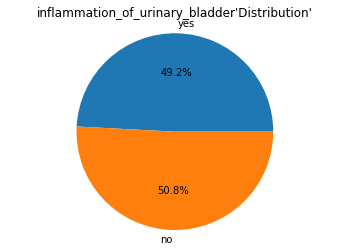

In [9]:
df_b = pd.DataFrame(index=['yes','no'],columns=df.select_dtypes(exclude=['float64']).columns)
for i in df.select_dtypes(exclude=['float64']).columns:
    df_b.loc['yes',i] = df[i][df[i]=='yes'].count()
    df_b.loc['no',i] = len(df)-df[i][df[i]=='yes'].count()
    
    fig, ax = plt.subplots()
    ax.pie(df_b[i],labels=df_b.index,autopct='%1.1f%%')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    ax.set_title(i+"'Distribution'")
    plt.show()



# Determining Target and Featues and Scaling

In [10]:
y=df.iloc[:,-1]
X = df.iloc[:,:-1]

In [11]:
X_numerical = pd.DataFrame(X.iloc[:,0])
X_categorical = pd.DataFrame(X.iloc[:,1:])

In [12]:
# Getting dummies
y = pd.get_dummies(y, drop_first=True)

X_categorical = pd.get_dummies(X_categorical,drop_first=True)


In [13]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data with `StandardScaler`

X_numerical_scaled =MinMaxScaler().fit_transform(X_numerical)

X.iloc[:,0] = X_numerical_scaled.reshape(-1,1)


In [14]:
X.iloc[:,0] = X_numerical_scaled.reshape(-1,1)

In [15]:
X = pd.concat([X_numerical,X_categorical],axis=1)

In [16]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# SETTING RANDOM FOREST MODEL AND OPTIMIZING ITS PARAMETERS

In [17]:
seed=42
#Instantiate a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=seed)

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [19]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=seed)


In [21]:
# Fitting
rf_random.fit(X_train,y_train)
ref_random_best_param = rf_random.best_params_
print('Random Forest Best Parameters:\n',ref_random_best_param)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600,

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   4.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   4.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=   5.2s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1200, m

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.2min finished


Random Forest Best Parameters:
 {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


In [22]:
rf = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5,min_samples_leaf= 1, max_features= 'auto', max_depth= 50, bootstrap=False)

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, min_samples_split=5,
                      n_estimators=1000)

In [23]:
# Prediction
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# VALIDATION METRICS AND PREDICTION

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Train data evaulatuin 
print("\n")
print("Train Data Mean absolute error (MAE):      %f" % mean_absolute_error(y_train,y_pred_train))
print("Train Data Mean squared error (MSE):       %f" % mean_squared_error(y_train,y_pred_train))
print("Train Data Root mean squared error (RMSE): %f" % np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Train Data R square (R^2):                 %f" % r2_score(y_train,y_pred_train))



Train Data Mean absolute error (MAE):      0.000000
Train Data Mean squared error (MSE):       0.000000
Train Data Root mean squared error (RMSE): 0.000000
Train Data R square (R^2):                 1.000000


In [27]:
# Test data evaulatuin 
print("\n")
print("Test Data Mean absolute error (MAE):      %f" % mean_absolute_error(y_test,y_pred_test))
print("Test Data Mean squared error (MSE):       %f" % mean_squared_error(y_test,y_pred_test))
print("Test Data Root mean squared error (RMSE): %f" % np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Test Data R square (R^2):                 %f" % r2_score(y_test,y_pred_test))



Test Data Mean absolute error (MAE):      0.000000
Test Data Mean squared error (MSE):       0.000000
Test Data Root mean squared error (RMSE): 0.000000
Test Data R square (R^2):                 1.000000


In [29]:
actual = pd.DataFrame(y_test)
actual.columns=['actual_inflammation_of_urinary_bladder']
actual.reset_index(drop=True,inplace=True)
predicted = pd.DataFrame(y_pred_test)
predicted.columns=['Predicted']

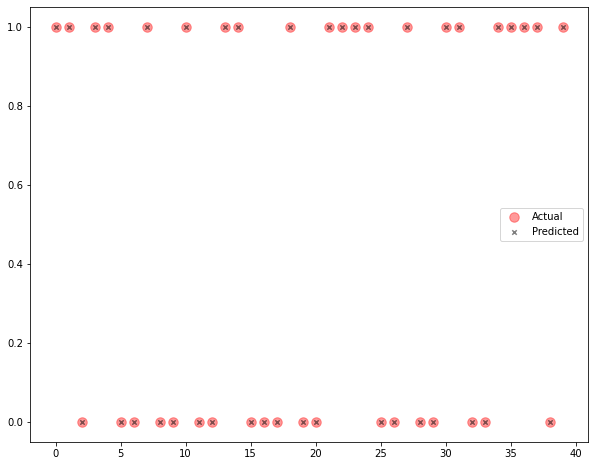

In [30]:
fig = plt.figure(figsize=(10,8))
plt.scatter(actual.index,actual.iloc[:,0],label='Actual',alpha=0.4,color='red',marker='o',s=90)
plt.scatter(predicted.index,predicted.iloc[:,0],label='Predicted',color='black',alpha=0.5,marker='x',s=20)
plt.legend(loc='best')
plt.show()